# Assignment 1

All answers should be filled in notebook. For theoretical question you can use LaTeX, or you can proof everyhting in paper then attach scanned version. Name of notebook should be in following format:
* name_group_assignment1.ipynb (ex. _alibekgaliyev_1902_assignment1.ipynb_)

Deadline for assignment #1 2021-01-09 (Saturday).

## Question 1 (2 point)

Read video games sales data from vgsales.csv file. This dataset contains a list of video games with sales greater than 100,000 copies. Fields include:
* Rank - Ranking of overall sales
* Name - The games name
* Platform - Platform of the games release (i.e. PC,PS4, etc.)
* Year - Year of the game's release
* Genre - Genre of the game
* Publisher - Publisher of the game
* NA_Sales - Sales in North America (in millions)
* EU_Sales - Sales in Europe (in millions)
* JP_Sales - Sales in Japan (in millions)
* Other_Sales - Sales in the rest of the world (in millions)
* Global_Sales - Total worldwide sales.

Using your favorite visualization library build histograms and boxplots for NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales? What is the average sales for each region? What is the standard deviation for each region? How many outliers (using IQR rule) we have in Global_Sales column? What is the difference between mean and median values in Global_Sales column? Remove outliers and plot histogram and boxplot again. What is the difference between mean and median now?

## Solution 1

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


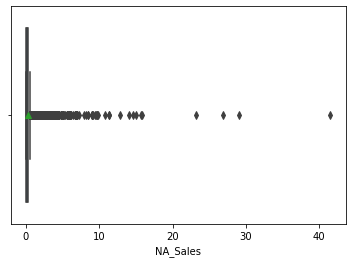

In [16]:
sns.boxplot(x=df['NA_Sales'], showmeans=True)

In [21]:
df['NA_Sales'].mean()

0.26466742981084057

In [26]:
df['NA_Sales'].std()

0.8166830292990428

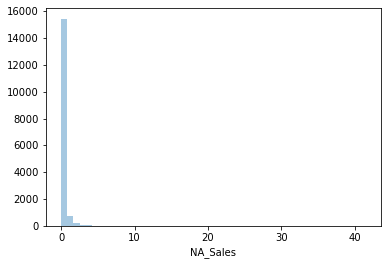

In [233]:
sns.distplot(df.NA_Sales, kde=False)

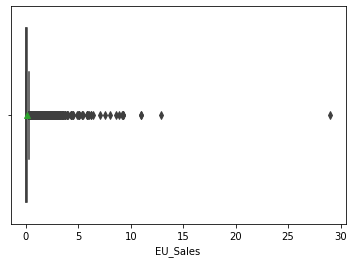

In [17]:
sns.boxplot(x=df['EU_Sales'], showmeans=True)

In [22]:
df['EU_Sales'].mean()

0.1466520062658483

In [27]:
df['EU_Sales'].std()

0.5053512312869366

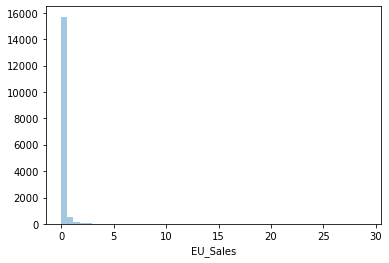

In [232]:
sns.distplot(df.EU_Sales, kde=False)

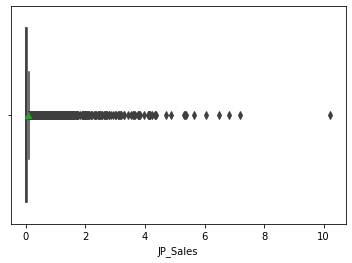

In [18]:
sns.boxplot(x=df['JP_Sales'], showmeans=True)

In [23]:
df['JP_Sales'].mean()

0.07778166044101108

In [28]:
df['JP_Sales'].std()

0.30929064808213236

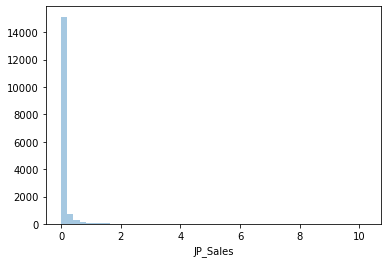

In [231]:
sns.distplot(df.JP_Sales, kde=False)

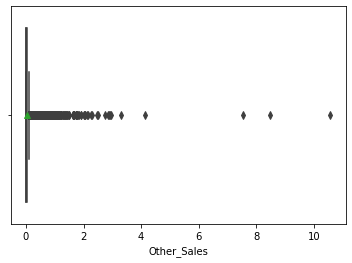

In [19]:
sns.boxplot(x=df['Other_Sales'], showmeans=True)

In [24]:
df['Other_Sales'].mean()

0.048063019640913515

In [29]:
df['Other_Sales'].std()

0.18858840291278392

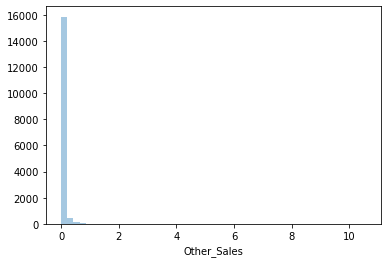

In [230]:
sns.distplot(df.Other_Sales, kde=False)

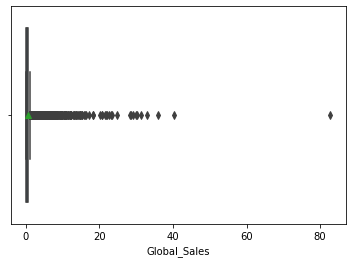

In [20]:
sns.boxplot(x=df['Global_Sales'], showmeans=True)

In [25]:
df['Global_Sales'].mean()

0.53744065550074

In [30]:
df['Global_Sales'].std()

1.5550279355699022

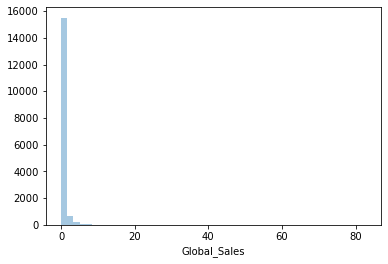

In [229]:
sns.distplot(df.Global_Sales, kde=False)

#### Outliers

In [36]:
q1 = np.percentile(df['Global_Sales'], 25, interpolation = 'midpoint') 
q3 = np.percentile(df['Global_Sales'], 75, interpolation = 'midpoint')
iqr = q3 - q1

In [38]:
iqr

0.41

In [40]:
# upper boundary
q3 + (1.5 * iqr)

1.085

In [41]:
# lower boundary
q1 - (1.5 * iqr)

-0.5549999999999999

In [61]:
# upper outliers number
(df['Global_Sales']>q3 + (1.5 * iqr)).sum()

1893

In [62]:
# upper outliers number
(df['Global_Sales']<q1 - (1.5 * iqr)).sum()

0

#### Mean and median in Global_Sales column

In [63]:
df['Global_Sales'].median()

0.17

In [64]:
df['Global_Sales'].mean()

0.53744065550074

The mean and median values differ from each other for about 0.37, which is quite significant. 

In [75]:
isOutlier = df['Global_Sales'] < 1.085

In [76]:
filtered = df[isOutlier]
filtered

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1893,1895,NASCAR Thunder 2004,PS2,2003.0,Racing,Electronic Arts,0.53,0.41,0.00,0.14,1.08
1894,1896,Prince of Persia,PS3,2008.0,Action,Ubisoft,0.47,0.41,0.03,0.18,1.08
1895,1897,SpongeBob SquarePants: Revenge of the Flying D...,PS2,2002.0,Platform,THQ,0.53,0.41,0.00,0.14,1.08
1896,1898,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08
1897,1899,The Biggest Loser,Wii,2009.0,Sports,THQ,0.87,0.12,0.00,0.09,1.08
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


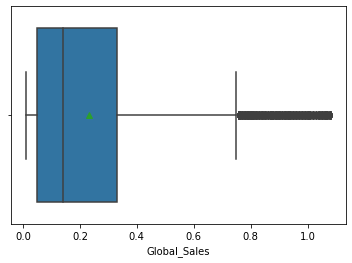

In [83]:
sns.boxplot(x = filtered['Global_Sales'], showmeans = True)

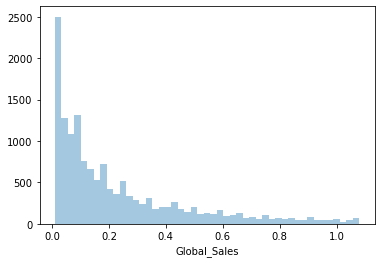

In [228]:
sns.distplot(filtered.Global_Sales, kde=False)

In [79]:
filtered['Global_Sales'].median()

0.14

In [80]:
filtered['Global_Sales'].mean()

0.23147432845973634

Now we can see that the mean and median are closer to each other, their difference is just about 0.09. The graph is now zoomed for several times and everything is clear because of the absence of outliers.

## Question 2 (1 point)

Using NumPy's random library:
* Write a NumPy program to shuffle numbers between 0 and 10 (inclusive)
* Write a NumPy program to generate six random integers between 10 and 30
* Write a program to simulate dice rolling
* Visualize number of occurences of each side of a die
* Find probability of getting even number, using simulation

## Solution 2

In [84]:
from numpy import random

In [109]:
arr = np.arange(0, 11)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [110]:
np.random.shuffle(arr)
arr

array([ 8,  2,  3,  0,  1,  6,  9,  5, 10,  4,  7])

In [188]:
# Write a NumPy program to generate six random integers between 10 and 30
y = random.randint(10, 30, size=10)

print(y)

[23 15 24 27 18 25 29 20 12 27]


[2 4 6 1 5 1 1 6 5 4 4 4 2 5 1 2 6 5 5 3 3 3 2 1 5 6 5 4 1 2 3 3 5 2 5 6 2
 5 4 4 1 2 2 2 2 6 3 4 2 1 5 6 1 4 1 1 3 2 4 5 3 5 2 3 4 4 4 3 6 1 5 4 4 4
 4 2 3 2 5 4 2 3 4 4 1 6 5 6 6 3 1 6 3 5 2 5 2 3 6 1 4 1 4 2 1 3 1 2 4 4 4
 5 5 1 2 6 1 3 6 3 3 2 6 3 6 2 1 6 5 5 1 3 5 2 5 1 5 6 1 4 3 1 2 3 3 5 6 5
 1 6 1 1 5 1 2 4 3 1 4 3 1 2 3 2 3 6 1 1 6 5 6 1 6 2 3 5 6 6 2 2 3 5 2 6 3
 3 1 4 3 5 5 6 2 2 4 3 6 6 6 3 3 2 4 2 6 3 4 3 5 2 4 2 3 6 5 1 3 2 5 6 4 5
 5 5 6 1 6 5 3 1 5 2 3 5 2 6 5 3 3 5 4 4 2 2 3 2 6 2 2 5 2 4 4 6 3 6 3 2 6
 4 6 4 2 1 5 6 4 5 2 1 2 6 4 4 6 2 4 5 6 5 5 2 5 6 6 6 5 3 1 2 2 5 6 5 2 4
 1 2 2 6 4 3 6 5 4 5 1 5 5 1 1 5 5 6 3 6 3 1 5 5 6 1 4 5 3 3 3 3 2 2 4 4 4
 3 1 4 1 4 6 1 5 5 4 2 6 3 4 1 6 3 4 4 6 3 3 1 3 4 6 6 5 2 3 1 1 3 4 5 6 3
 3 3 2 1 3 3 2 3 4 6 4 2 1 4 6 5 4 4 1 3 1 5 4 3 3 2 2 1 2 4 2 3 4 6 5 5 5
 3 4 2 3 3 4 3 1 5 6 2 3 1 2 5 3 1 2 6 6 1 6 2 5 6 1 6 1 4 4 6 4 2 6 6 3 2
 1 4 2 5 4 2 5 5 1 1 1 6 1 5 6 1 5 4 2 1 6 3 1 4 5 6 2 3 4 3 2 2 5 5 4 1 4
 6 4 5 3 1 4 5 4 3 2 4 3 

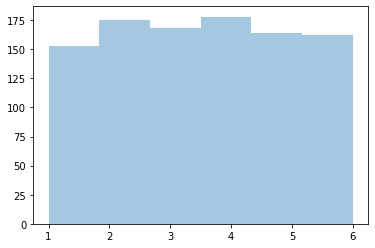

In [224]:
# Write a program to simulate dice rolling
w = random.randint(1, 7, size=1000)

print(w)

# Visualize number of occurences of each side of a die
sns.distplot(w, kde=False, bins=6)

Since dice has 6 sides, 3 of them odd and 3 of them even numbers, the probability of getting even number will be 1/2. 

**In theory, the probability should be 1/2 or 50%, in the next cell, I will check it in practice by using a function.**

In [225]:
def probability(x):
    counter=0
    n=len(x)
    for num in x:
        if (num%2)==0:
            counter+=1
    print("# of even numbers: " + str(counter))
    p = (counter/n)*100
    print("The probability of getting even number: " + str(p) + "%")

probability(w)

# of even numbers: 515
The probability of getting even number: 51.5%


We see that our hypothesis is right because the probability that we got in practice is close to our number that we found out in the theory part. 

## Question 3 (1 point)

Generate synthetic data (numpy.random.normal) with mean = 35, std = 15 and size = 1000 (round it to nearest integer). Plot histogram. What is the mean, median and mode? Build function to calculate standard deviation using standard Python functionality. Calculate std. using your function.

## Solution 3

In [185]:
z = random.normal(loc=35, scale=15, size=1000)
print(z)

[ 41.34631562  34.96842598  29.7184416   34.50875585  59.85839628
  43.26407932  63.50755101  46.85970583  28.00662659  22.25316887
 -10.83593035  24.28265624  41.65974009  54.43181318  15.17370993
  41.6801142   34.08685241   0.50587138  33.81585474  33.57845738
  36.62543854  26.13783262  12.80625143  32.94177883  18.4226993
  60.34565835  35.03011105  29.43766527  60.58630882   8.37149687
  30.19898294  29.02461816  42.43916886  14.23451954  37.66052712
  39.613417    24.42619602  25.98257241  24.15540936  52.13998979
  34.59025044  35.90992621  28.6249575   29.31596601  31.9628328
  14.85241004  39.55787977  40.65214402  13.64871397  42.16719223
  33.72786545   1.4494704   46.61493883  11.55720098  46.87113889
  41.17780358  54.67924053  31.05460942  35.83856126  53.23590081
  33.12044636  43.09634153  50.8612657   42.0174435   42.52874893
  46.0370023   11.2796773   26.86664478  11.17901173  32.80152817
  65.96367971  50.61087381  31.8411791   39.18624186  35.49955734
  32.4868017

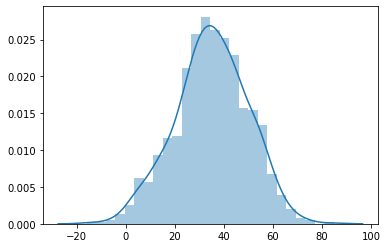

In [186]:
sns.distplot(z)

In [176]:
import math

In [235]:
# Build function to calculate 
#standard deviation using standard Python functionality. Calculate std. using your function.
def findstd(x):
    sum=0
    n=len(x)
    for num in x:
        sum+=num
    mean=sum/n
    
    mainsum=0
    for num in x:
        mainsum+=pow((num-mean), 2)
    answer=math.sqrt(mainsum/n-1)
    print("Mean: " + str(mean))
    print("St. deviation: " + str(answer))
findstd(z)

Mean: 35.00530805121291
St. deviation: 14.816123106903937


## Question 4 (1 point)

From previous problem parameters (mean=35, std=15), find:
* probability of getting item less than 20
* probability of getting item greater than third quartile
* probabilty of getting item within first and third quartiles
* probabilty of getting item less than 10th percentile __or__ greater than 95th percentile

## Solution 4

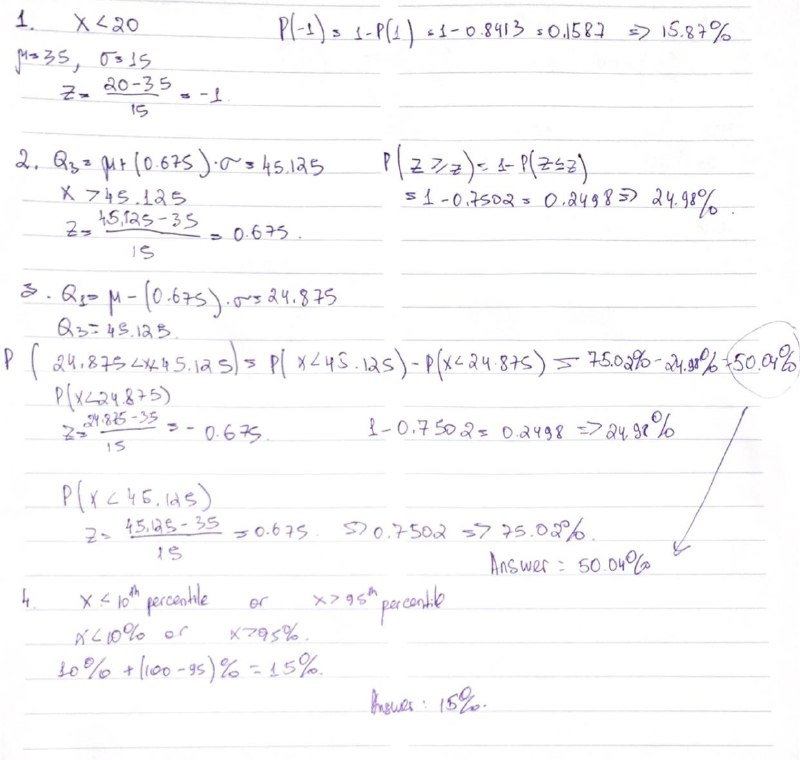

In [238]:
from IPython.display import Image
Image(filename='question_4.jpg')

## Question 5 (1 point)

Try to simulate all problems from previous question 4, and find probabilities using loops?

## Solution 5

In [244]:
def first(x):
    counter=0
    n=len(x)
    for num in x:
        if num<20:
            counter+=1
    answer=(counter/n)*100
    print("A probability of getting item less than 20: " + str(answer) + "%")
    
first(z)

A probability of getting item less than 20: 15.4%


In [250]:
def second(x):
    counter=0
    n=len(x)
    q3=np.quantile(x, 0.75)
    for num in x:
        if num>q3:
            counter+=1
    answer=(counter/n)*100
    print ("A probability of getting item greater than third quartile: " + str(answer) + "%")
    
second(z)

A probability of getting item greater than third quartile: 25.0%


In [253]:
def third(x):
    counter=0
    n=len(x)
    q1=np.quantile(x, 0.25)
    q3=np.quantile(x, 0.75)
    for num in x:
        if q1<num<q3:
            counter+=1
    answer=(counter/n)*100
    print ("A probabilty of getting item within first and third quartiles: " + str(answer) + "%")
    
third(z)

A probabilty of getting item within first and third quartiles: 50.0%


In [256]:
def fourth(x):
    counter=0;
    n=len(x)
    p10=np.percentile(x, 10)
    p95=np.percentile(x, 95)
    for num in x:
        if num>p95 or num<p10:
            counter+=1
    answer=(counter/n)*100
    print("A probabilty of getting item less than 10th percentile or greater than 95th percentile: " + str(answer) + "%")
    
fourth(z)

A probabilty of getting item less than 10th percentile or greater than 95th percentile: 15.0%


## Question 6 (1 point)

Proof the following expression:
$$Var(x) = E((X-\mu)^2) = E(X^2) - (E(X))^2$$

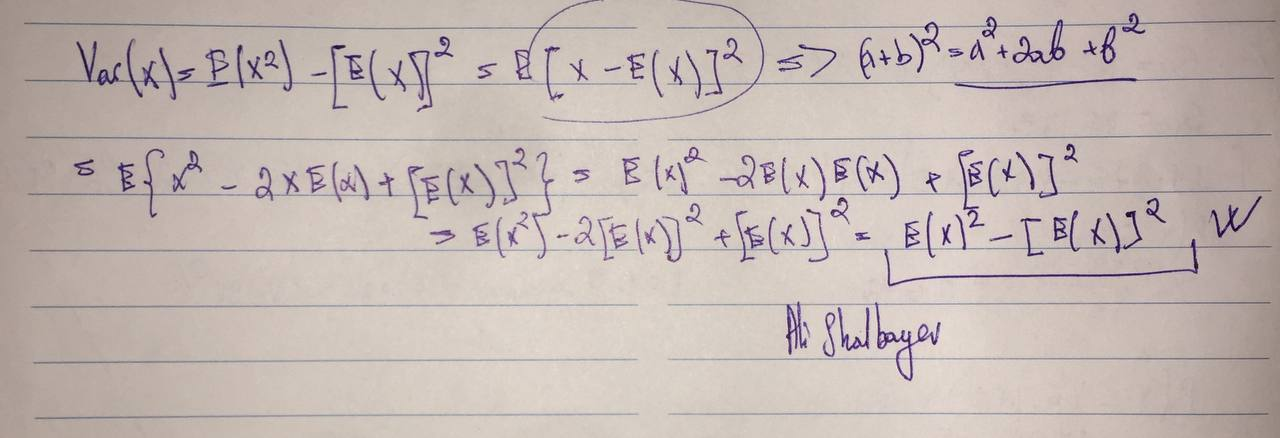

In [257]:
Image(filename='question_6.jpg')